In [1]:
import pandas as pd

In [7]:
df_para = pd.read_csv("para_20.csv")

In [8]:
df_para = df_para.drop(columns='Unnamed: 0')

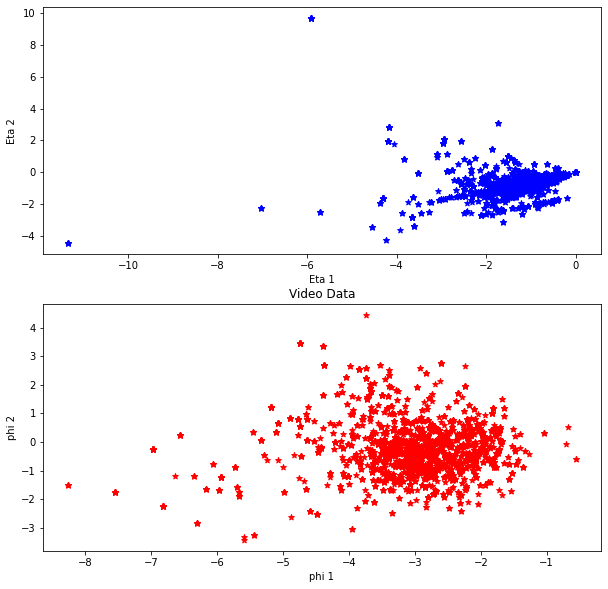

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'car' is an existing DataFrame with columns 'x1', 'x2', ..., 'x8'

# Rename columns
#car.columns = ["economy", "service", "value", "price", "design", "sporty", "safety", "handling"]

# Rename rows (index)
#car.index = ["Audi", "BMW", "Citroen", "Ferrari", "Fiat", "Ford", "Hyundai",
#             "Jaguar", "Lada", "Mazda", "Mercedes", "Mitsubishi", "Nissan",
#             "Opel Corsa", "Opel Vectra", "Peugeot", "Renault", "Rover",
#             "Toyota", "Trabant", "VW Golf", "VW Passat", "Wartburg"]

# Reorder columns
#cars = car[["price", "value", "economy", "service", "design", "sporty", "safety", "handling"]]
cars = df_para
# Covariance matrix
s = cars.cov()

# Submatrices
sa = s.iloc[0:7, 0:7]
sb = s.iloc[7:20, 7:20]

# Eigen decomposition
eiga = np.linalg.eig(sa)
eigb = np.linalg.eig(sb)

# Scaling matrices
sa2 = eiga[1] @ np.diag(1/np.sqrt(eiga[0])) @ eiga[1].T
sb2 = eigb[1] @ np.diag(1/np.sqrt(eigb[0])) @ eigb[1].T

# Compute k
k = sa2 @ s.iloc[0:7, 7:20] @ sb2

# Singular Value Decomposition
si = np.linalg.svd(k)

# Compute a and b
a = sa2 @ si[0]
b = sb2 @ si[2].T

# Projections
eta = cars.iloc[:, 0:7].to_numpy() @ a[:, 0]
phi = cars.iloc[:, 7:20].to_numpy() @ b[:, 0]
eta2 = cars.iloc[:, 0:7].to_numpy() @ a[:, 1]
phi2 = cars.iloc[:, 7:20].to_numpy() @ b[:, 1]
etaphi = np.column_stack((eta, phi))

# Plot

plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.scatter(eta,eta2,marker = '*',c='blue')
#plt.scatter(etaphi[:, 0], etaphi[:, 1], marker='*',c ='blue')
#for i, txt in enumerate(car.index):
#    plt.annotate(txt, (etaphi[i, 0], etaphi[i, 1]))
plt.xlabel("Eta 1")
plt.ylabel("Eta 2")
#plt.ylabel("Phi 1")
plt.subplot(2,1,2)
plt.scatter(phi,phi2,marker = '*',c='red')
#plt.scatter(etaphi[:, 0], etaphi[:, 1], marker='*',c ='blue')
#for i, txt in enumerate(car.index):
#    plt.annotate(txt, (etaphi[i, 0], etaphi[i, 1]))
plt.xlabel("phi 1")
plt.ylabel("phi 2")
plt.title("Video Data")
plt.show()


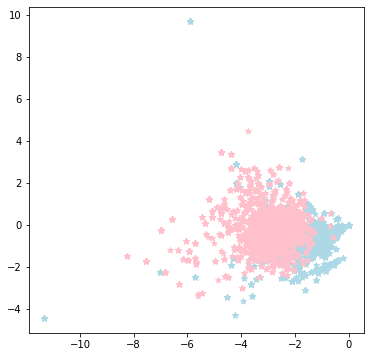

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(eta,eta2,marker = '*',c='lightblue')
plt.scatter(phi,phi2,marker = '*',c='pink')
plt.savefig('20_CCA.png',transparent = True)

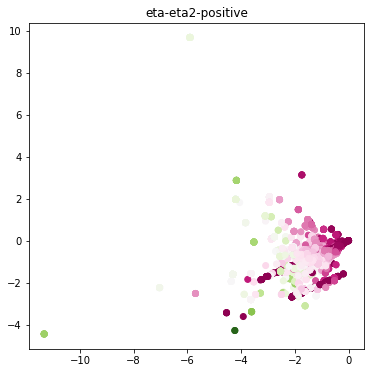

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 假设我们有以下点的坐标和对应的positive值
plt.figure(figsize=(6,6))
positives = np.array(list(cars['pos_no']))
plt.title("eta-eta2-positive")

plt.scatter(eta,eta2, c = positives, cmap = 'PiYG')

plt.savefig("eta-posi_20.png",transparent = True)



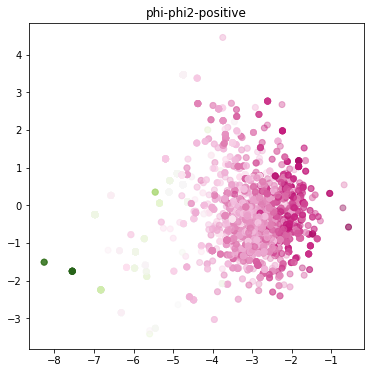

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(6,6))
# 假设我们有以下点的坐标和对应的positive值

positives = np.array(list(df_para[['pos_p', 'vocalpositive', 'eval_pos']].mean(axis=1)))

plt.title("phi-phi2-positive")
plt.scatter(phi,phi2, c = positives, cmap = 'PiYG', alpha = 0.4)
plt.savefig("phi-posi_20.png",transparent = True)
#plt.colorbar()
